In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython import display
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import time

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/heveraldo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("WordCloud") \
    .getOrCreate()


22/12/06 10:21:09 WARN Utils: Your hostname, heveraldo-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
22/12/06 10:21:09 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/06 10:21:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/12/06 10:21:19 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [10]:
def trata_data(df):
    words = df \
        .select(f.explode(f.split(f.lower('_c0'), " ")).alias("word"))\
        .withColumn('word', f.regexp_replace('word', r'http\S+', ''))\
                .withColumn('word', f.regexp_replace('word', r'@\w+', ''))\
                    .withColumn('word', f.regexp_replace('word', 'rt', ''))\
                        .na.replace('', None)\
                            .na.drop()
    return words
     

ERROR:root:KeyboardInterrupt while sending command.========>      (45 + 3) / 51]
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.8/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.8/socket.py", line 669, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


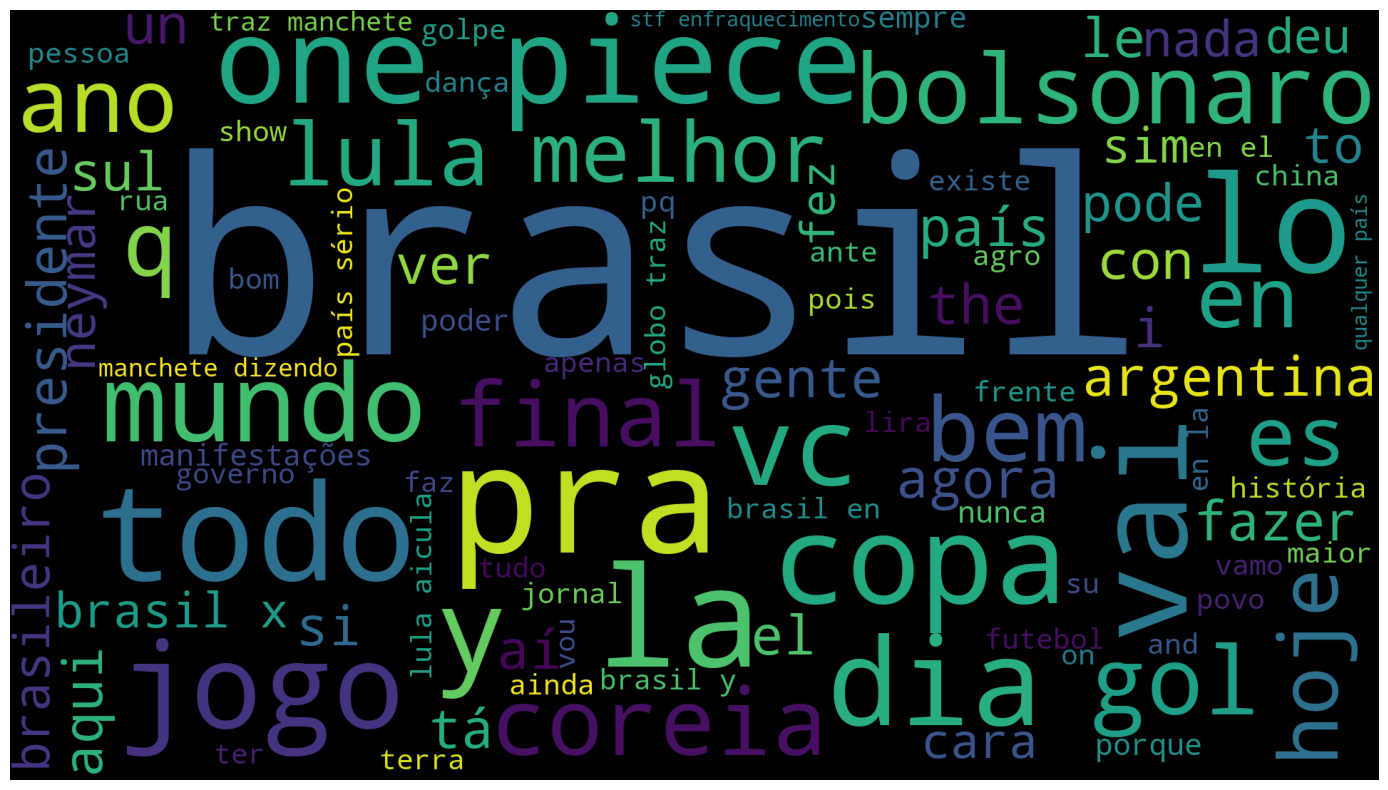

In [12]:
stops = stopwords.words('portuguese')   
stops.append('futeboll')
plt.figure(figsize=(20, 10)) 

while True: 
    try:
            words = spark.read.csv('./csv', encoding='utf-8')
            words = trata_data(words)
            rows = words.collect()
            all_words= ''
            for row in rows:
                all_words = all_words + ' ' + row['word']
                
            wordcloud = WordCloud(stopwords=stops,
                                  background_color='black',
                                  width=1920,
                                  height=1080,
                                  max_words=100).generate(all_words)
            plt.cla()        
            plt.axis('off')
            plt.imshow(wordcloud)
            display.display(plt.gcf())  
            display.clear_output(wait=True) 
            time.sleep(15)
    except KeyboardInterrupt:
        break
